<a href="https://colab.research.google.com/github/camilodlt/rtidy-python/blob/master/Computer%20vision/CIFAR/1_Deep_Learning_Models_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-layer Perceptron for image classification

Task 1 : 

The shape of the input tensor for MLP is 2D tensor, the dimension of which is (batch_size, total_number_of_pixels).
So you need to reshape the image to (Node, 32 * 32 * 3)

Task 2:  

Build Multi-Layer Perceptron for image classification with tf.keras functional API



#### Code to load CIFAR10 dataset and visualize the CIFAR10 images


In [71]:
# LOAD LIBS ------
import tensorflow as tf 
import keras 
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
# TF VERSION ------
print("TF VERSION: ",tf.version.VERSION)
# PYTHON VERSION ------
print("Python Version:",sys.version)
# LOAD DATA ------ 
# we can simplely use the tf.keras.datasets.cifar10.load_data API to load dataset
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.cifar10.load_data()

TF VERSION:  2.6.0
Python Version: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]


Even for a human is quite difficult to recognize this tiny images. 

The first image from the second row (the one with label 4) is unrecognizable. 

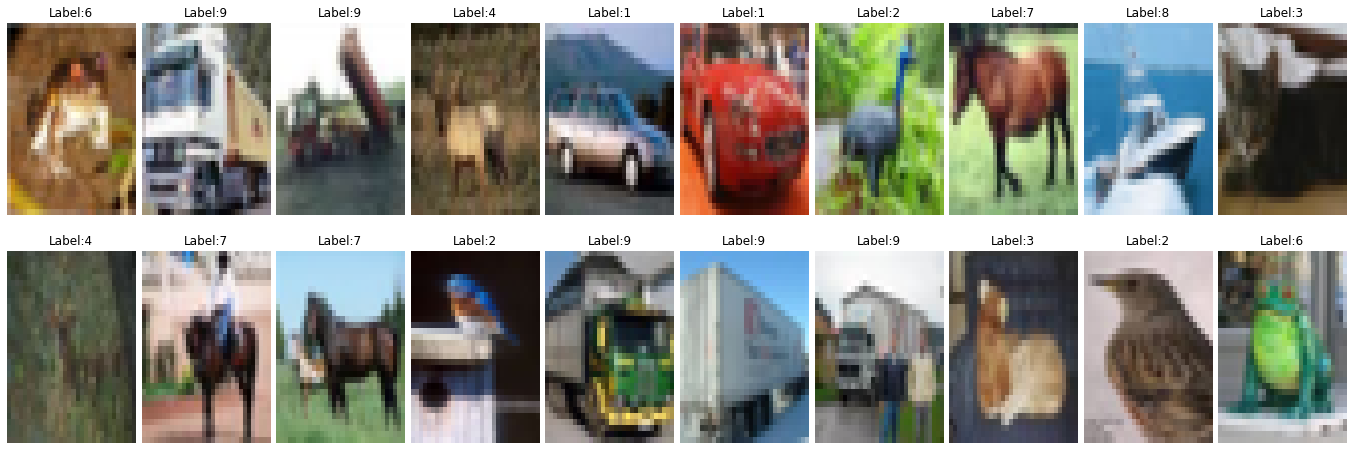

In [66]:
# PRINT SOME IMAGES ------
_, axs = plt.subplots(2, 10, figsize=(8*3, 8),gridspec_kw={'wspace':0.05, 'hspace':0.1},squeeze=True)
axs = axs.flatten()
for img,y, ax in zip(x_train[0:21],y_train[0:21], axs):
    ax.axis('off')
    ax.imshow(img,aspect='1.5')
    ax.set_title(f"Label:{str(y[0])}")
plt.show()


In [72]:
# TASK 1 : 
x_train= x_train.reshape((x_train.shape[0],32*32*3)) # flatten each image
print(x_train.shape)
#* Same for testing --- 
x_test= x_test.reshape((x_test.shape[0],32*32*3))
print(x_test.shape)

# Scale --- 
x_train= x_train/255
x_test= x_test/255


(50000, 3072)
(10000, 3072)


#### Code to build and train the MLP

In [73]:
# Task 2: 

# Keras Functional API  ---

  #* Layers --- 
inputs = tf.keras.Input(shape=(x_train.shape[1],),name="Image_flatten")
x = tf.keras.layers.Dense(1024, activation="relu",name="Perceptron_1")(inputs)
x = tf.keras.layers.Dense(256, activation="relu",name="Perceptron_2")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax",name="output_Perceptron")(x)
  #* Model --- 
model = keras.Model(inputs=inputs, outputs=outputs, name="Cifar_10_mlp_model")
model.summary()

Model: "Cifar_10_mlp_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_flatten (InputLayer)   [(None, 3072)]            0         
_________________________________________________________________
Perceptron_1 (Dense)         (None, 1024)              3146752   
_________________________________________________________________
Perceptron_2 (Dense)         (None, 256)               262400    
_________________________________________________________________
output_Perceptron (Dense)    (None, 10)                2570      
Total params: 3,411,722
Trainable params: 3,411,722
Non-trainable params: 0
_________________________________________________________________


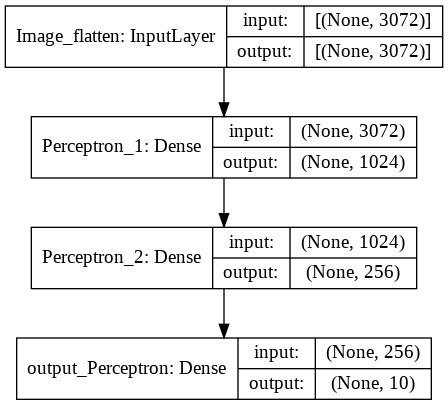

In [74]:
# DISPLAY FULL MODEL --- 
keras.utils.vis_utils.plot_model(model, "CIFAR_MLP.png", show_shapes=True)


In [75]:
# COMPILE MODEL --- 
model.compile(#optimizer="adam",
              loss="sparse_categorical_crossentropy", #Since we did not one hot encode y_train
              metrics= [ "sparse_categorical_accuracy"])


history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 2.1512 - sparse_categorical_accuracy: 0.2749 - val_loss: 1.8362 - val_sparse_categorical_accuracy: 0.3440
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 1.7493 - sparse_categorical_accuracy: 0.3715 - val_loss: 1.7095 - val_sparse_categorical_accuracy: 0.3871
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 1.6595 - sparse_categorical_accuracy: 0.4074 - val_loss: 1.6638 - val_sparse_categorical_accuracy: 0.4048
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 1.5957 - sparse_categorical_accuracy: 0.4304 - val_loss: 1.6479 - val_sparse_categorical_accuracy: 0.4159
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 1.5532 - sparse_categorical_accuracy: 0.4464 - val_loss: 1.5727 - val_sparse_categorical_accuracy: 0.4484
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 1.5221 - sparse_categorica

#### Code to test and explore the trained MLP

In [112]:
# EVALUATION ------
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.5518 - sparse_categorical_accuracy: 0.4812
Test loss: 1.5517921447753906
Test accuracy: 0.4812000095844269


Well, the MLP performed very poorly if we don't scale the images. We only obtained 10% accuracy on the test set. 

With scaling, after 20 training epochs, we obtained 48% accuracy, altough the model started overfitting, possibly at epoch 14.

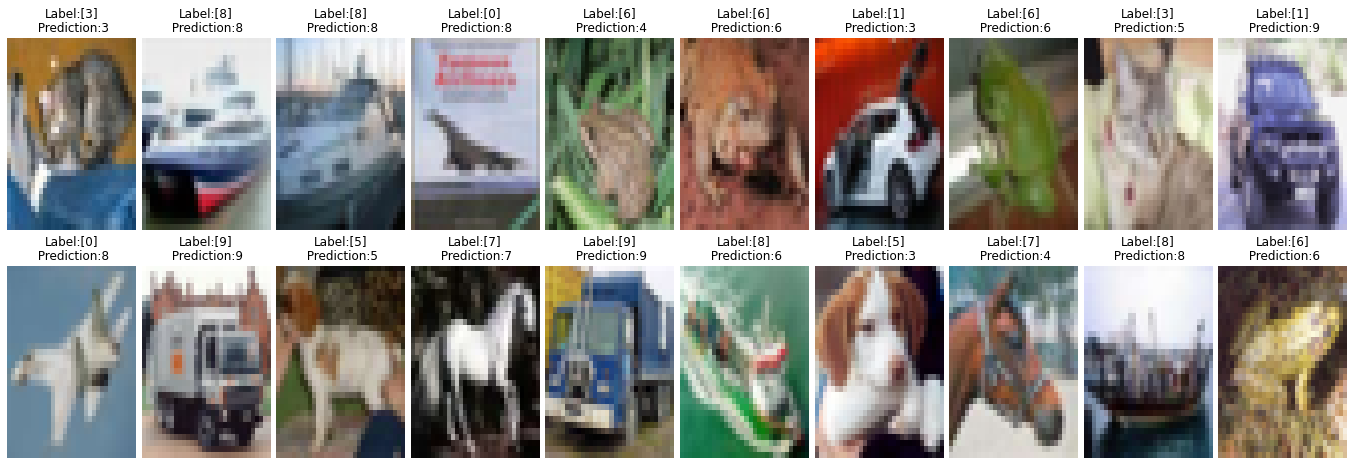

In [111]:
# GET PREDICTIONS ---
preds= model.predict(x_test,batch_size= 64)

# PRINT SOME IMAGES ------
_, axs = plt.subplots(2, 10, figsize=(8*3, 8),gridspec_kw={'wspace':0.05, 'hspace':0.1},squeeze=True)
axs = axs.flatten()
for img,y,y_hat,ax in zip(x_test[0:20].reshape((20,32,32,3)),y_test[0:20],np.argmax(preds[0:20],1), axs):
    ax.axis('off')
    ax.imshow(img,aspect='1.5')
    ax.set_title(f"Label:[{str(y[0])}]\n Prediction:{str(y_hat)}")
plt.show()

It's funny how it thought that the testing image number 10 was a truck and not an "automobile". To be fair, it seems to be a kind of 4x4 car. 

## Convolutional neural network for image classification 

Since we didn't get good results with our fully connected layers, we hope to better fit the data and discover patterns with convolutional layers. 

CONV nets accept images by default so out images will have to be reshaped to it's original size. Fortunately, the channel is already at it's place so we don't have to permute the arrays. 


In [114]:
# RESHAPE TO ORIG SIZE ------
x_train= x_train.reshape((x_train.shape[0],32,32,3))
x_test= x_test.reshape((x_test.shape[0],32,32,3))
# PRINT SHAPES 
print("x_train new shape:",x_train.shape)
print("x_train new shape:",x_test.shape)


x_train new shape: (50000, 32, 32, 3)
x_train new shape: (10000, 32, 32, 3)


### Code to build and train the CNN



In [137]:
# Build a 3 layers CONVNET 
  #* Layers --- 

inputs = tf.keras.Input(shape=(32,32,3,),name="Image_flatten")

x= tf.keras.layers.Conv2D(32,kernel_size=(3,3), name="First_CONV")(inputs) # 32 FILTERS, 3*3 kernel boxes
x= tf.keras.layers.MaxPooling2D()(x) # default 2*2

x= tf.keras.layers.Conv2D(64,kernel_size=(3,3), name="Second_CONV")(x) # 64 FILTERS, 3*3 kernel boxes
x= tf.keras.layers.MaxPooling2D()(x) # default 2*2

x= tf.keras.layers.Conv2D(64,kernel_size=(3,3), name="Third_CONV")(x) # 64 FILTERS, 3*3 kernel boxes

x= tf.keras.layers.Flatten()(x)
x= tf.keras.layers.Dense(64, activation="relu", name= "Dense_1")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax",name="output_Dense_2")(x)
  #* Model --- 
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="Cifar_10_CONV_model")
model.summary()

Model: "Cifar_10_CONV_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_flatten (InputLayer)   [(None, 32, 32, 3)]       0         
_________________________________________________________________
First_CONV (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
Second_CONV (Conv2D)         (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
Third_CONV (Conv2D)          (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_17 (Flatten)         (None, 1024)      

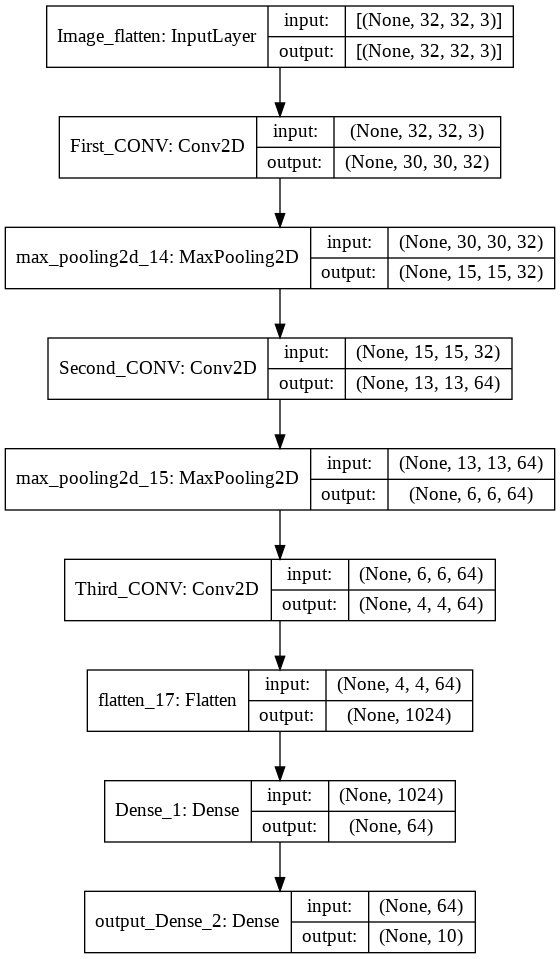

In [138]:
# DISPLAY FULL MODEL --- 
tf.keras.utils.plot_model(model, "Cifar_10_CONV_model.png", show_shapes=True)


In [140]:
# COMPILING AND TRAINING --- 
# COMPILE MODEL --- 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", #Since we did not one hot encode y_train
              metrics= ["sparse_categorical_accuracy"])


history_conv = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 34s 13ms/step - loss: 1.5400 - sparse_categorical_accuracy: 0.4543 - val_loss: 1.3048 - val_sparse_categorical_accuracy: 0.5439
Epoch 2/20
625/625 [==============================] - 7s 12ms/step - loss: 1.1882 - sparse_categorical_accuracy: 0.5846 - val_loss: 1.1998 - val_sparse_categorical_accuracy: 0.5882
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 1.0477 - sparse_categorical_accuracy: 0.6367 - val_loss: 1.0840 - val_sparse_categorical_accuracy: 0.6225
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.9508 - sparse_categorical_accuracy: 0.6709 - val_loss: 0.9885 - val_sparse_categorical_accuracy: 0.6578
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.8864 - sparse_categorical_accuracy: 0.6912 - val_loss: 1.0120 - val_sparse_categorical_accuracy: 0.6558
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 0.8266 - sparse_cat

#### Code to test and explore the trained CNN

Results improved dramatically, but te model overfitted rapidly! From epoch 3, the validation loss and accuracy stagnated or even increased whereas the same metrics kept improving for the training set. 

Clearly we should implement some sort of regularization, dropout or reduce the model's capacity. 

Still, we obtained better results with this simple convnet that with our multilayer layer perceptron. 


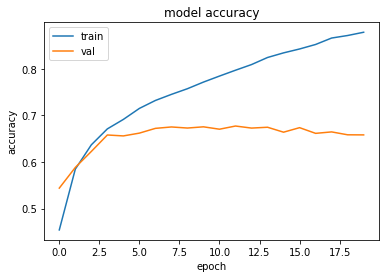

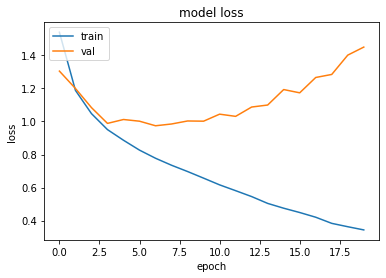

In [143]:
# VIZ LOSS AND ACCURACY ---
plt.plot(history_conv.history['sparse_categorical_accuracy'])
plt.plot(history_conv.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [144]:
# EVALUATION ------
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.4519 - sparse_categorical_accuracy: 0.6574
Test loss: 1.451947569847107
Test accuracy: 0.6574000120162964


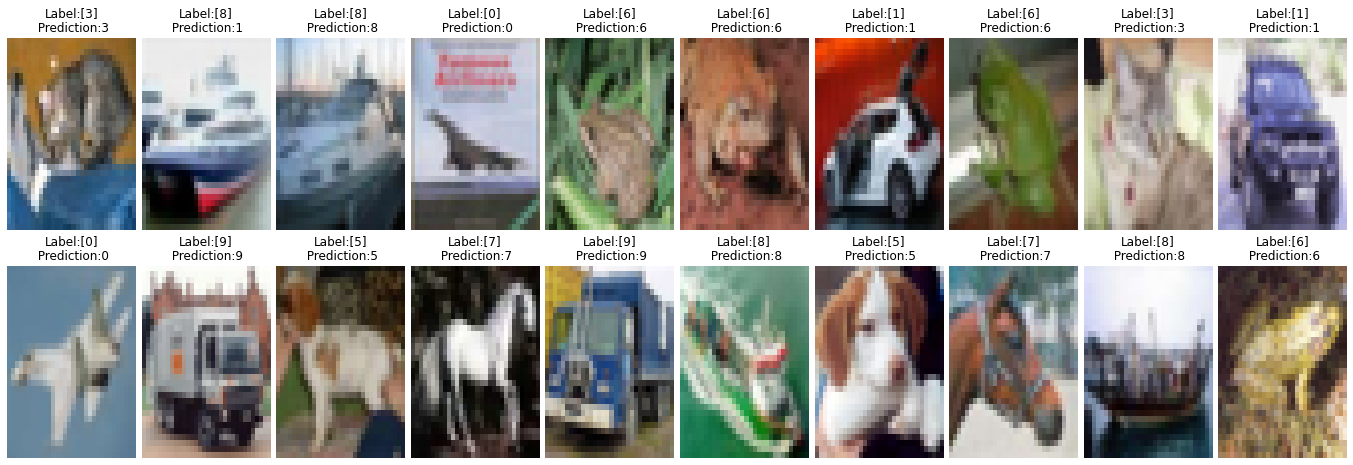

In [145]:
# GET PREDICTIONS ---
preds= model.predict(x_test,batch_size= 64)

# PRINT SOME IMAGES ------
_, axs = plt.subplots(2, 10, figsize=(8*3, 8),gridspec_kw={'wspace':0.05, 'hspace':0.1},squeeze=True)
axs = axs.flatten()
for img,y,y_hat,ax in zip(x_test[0:20].reshape((20,32,32,3)),y_test[0:20],np.argmax(preds[0:20],1), axs):
    ax.axis('off')
    ax.imshow(img,aspect='1.5')
    ax.set_title(f"Label:[{str(y[0])}]\n Prediction:{str(y_hat)}")
plt.show()

**This time our 4x4 car got the right predicted label !** 

Sadly a boat was predicted to be a car


In [149]:
%%capture
!pip install emoji --upgrade

In [150]:
import emoji; print(emoji.emojize('Sadly a boat was predicted to be a car :sad_but_relieved_face:'))

Sadly a boat was predicted to be a car 😥
